In [1]:
import sys

sys.path.insert(0, "/home/esrf/james1997a/Code/ImageD11")

In [2]:
from ImageD11.grain import grain
from ImageD11.unitcell import unitcell
import numpy as np
from scipy.spatial.transform import Rotation as R

from orix.quaternion import Orientation, Rotation
from orix.quaternion.symmetry import get_point_group
from orix.vector import Miller
from orix.crystal_map import Phase
from orix.plot import IPFColorKeyTSL
from orix.vector.vector3d import Vector3d

from diffpy.structure import Lattice, Structure

from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
hexagonal_ucell_array = np.array([2.94, 2.94, 4.72, 90, 90, 120])
hexagonal_ucell = unitcell(hexagonal_ucell_array, symmetry=194)
B = hexagonal_ucell.B

In [4]:
# make a reference unit cell too

ref_hexagonal_ucell_array = np.array([2.94, 2.94, 4.72, 90, 90, 120])
ref_hexagonal_ucell = unitcell(ref_hexagonal_ucell_array, symmetry=194)

In [5]:
# generate 1000 random orientations

Us = R.random(10000).as_matrix()

In [6]:
UBs = Us @ B

In [7]:
def ipf_plot_UBs(ref_ucell, UBs, ipf_direction=np.array([0, 0, 1])):
    if not isinstance(ipf_direction, Vector3d):
        # make it a Vector3D if not already
        ipf_direction = Vector3d(ipf_direction)
    
    # get the color for all the orientations
    rgb, meta_orien = ref_ucell.get_ipf_colour(UBs, axis=ipf_direction, return_orien=True)
    
    # scatter them
    meta_orien.scatter("ipf", c=rgb, direction=ipf_direction)

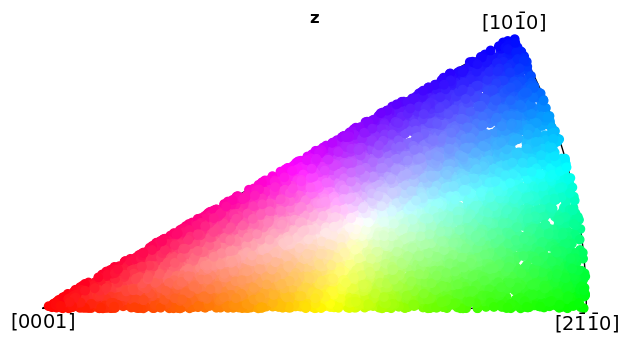

In [8]:
ipf_plot_UBs(ref_hexagonal_ucell, UBs)

In [11]:
def plot_all_ipfs(ref_ucell, UBs):
    ipf_plot_UBs(ref_ucell, UBs, ipf_direction=np.array([1., 0, 0]))
    ipf_plot_UBs(ref_ucell, UBs, ipf_direction=np.array([0., 1, 0]))
    ipf_plot_UBs(ref_ucell, UBs, ipf_direction=np.array([0., 0, 1]))

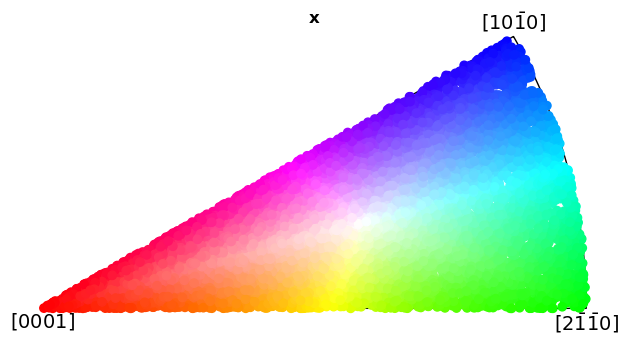

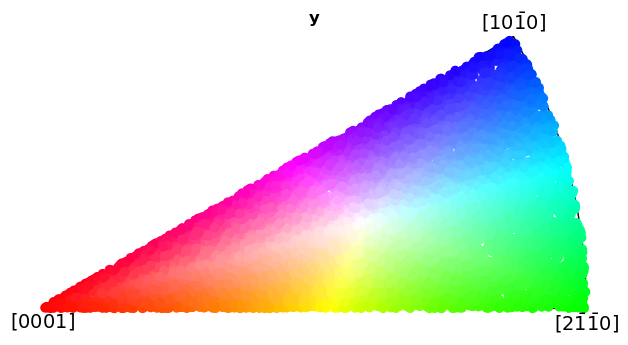

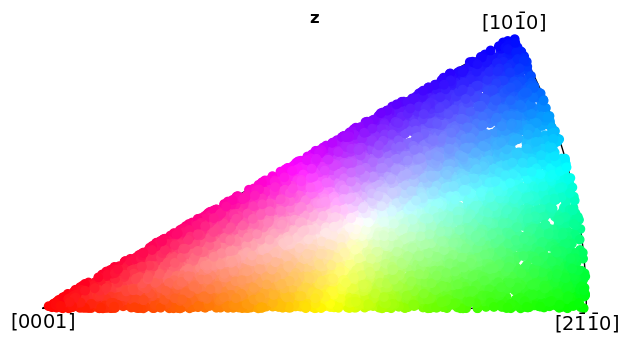

In [13]:
plot_all_ipfs(hexagonal_ucell, UBs)

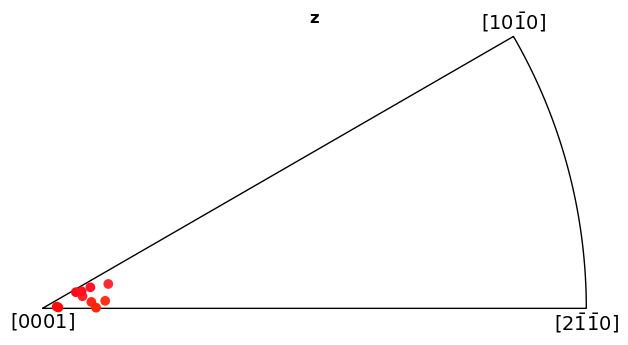

In [14]:
# generate 10 orientations clustered near identity
# they'll all be rotated around x and y such that c* doesn't point exactly || z

Us = R.from_euler(seq='xy', angles=(np.random.random((10, 2))-0.5)*25, degrees=True).as_matrix()

UBs = Us @ B

ipf_plot_UBs(hexagonal_ucell, UBs)

In [15]:
def pf_plot_UBs(ref_ucell, UBs, uvw=np.array([1., 0., 0.])):
    # make a combined orientation from them (makes plot much faster)
    meta_orien = ref_ucell.get_orix_orien(UBs)
    
    # make Miller object from uvw
    m1 = Miller(uvw=uvw, phase=ref_ucell.orix_phase).symmetrise(unique=True)
    
    # get outer product of all orientations with the crystal direction we're interested in
    uvw_all = (~meta_orien).outer(m1)
    
    uvw_all.scatter(hemisphere="both", axes_labels=["X", "Y"])

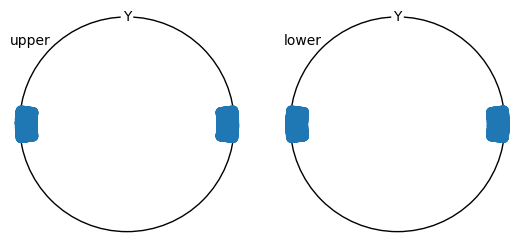

In [24]:
# let's test a triclinic too:

# Labradorite
# ICSD 100232
# 8.1736 12.8736 7.1022 93.462 116.054 90.475
# space group 2
triclinic_ucell_array = np.array([8.1736, 12.8736, 7.1022, 93.462, 116.054, 90.475])
triclinic_ucell = unitcell(triclinic_ucell_array, symmetry=2)

B = triclinic_ucell.B

# establish some orientations that are all close to a* || x
# we do this by rotating around y and z slightly

Us = R.from_euler(seq='yz', angles=(np.random.random((10000, 2))-0.5)*15, degrees=True).as_matrix()

UBs = Us @ B

# U is identity
# a* should be along x_lab

uvw = Miller(hkl=(1,0,0),phase=triclinic_ucell.orix_phase).uvw

pf_plot_UBs(triclinic_ucell, UBs, uvw)